In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np
import pylab as plt

import localpaths
import subimage
import lisa

In [23]:
si = lisa.parse_annotations('~/Data/LISA/allAnnotations.csv', lisa.LISA_17_CLASS_MAP)

y_all = np.array(si._y)

there are 534 tracks in total


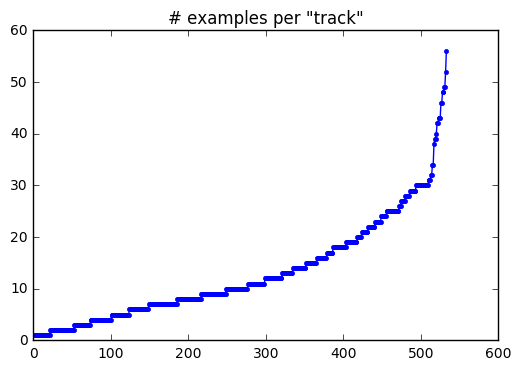

In [24]:
#
# Preliminary analysis of LISA tracks
#
trk_to_class, trk_to_cnt = si.group_info()

print('there are %d tracks in total' % len(trk_to_class))

track_lengths = np.array(list(trk_to_cnt.values()))

plt.figure()
plt.plot(np.sort(track_lengths), '.-')
plt.title('# examples per "track"')
plt.show()

# train, # test: 4016 1405


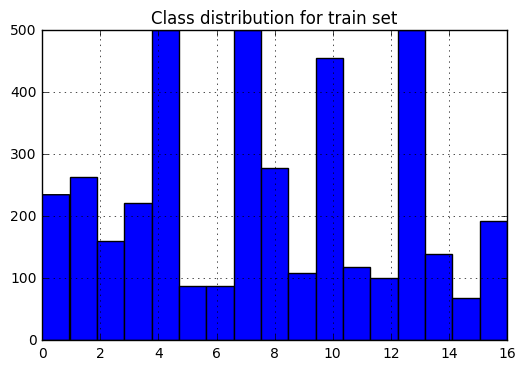

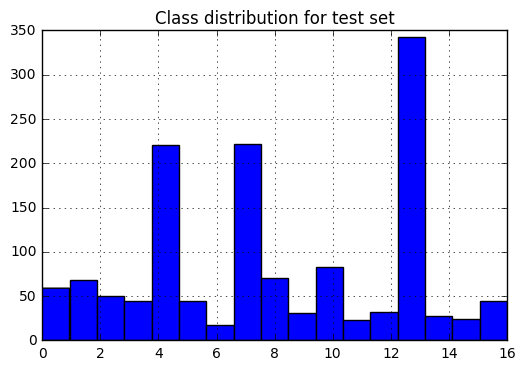

In [25]:
train_idx, test_idx = lisa.default_train_test_split(si, max_per_class=500)
#train_idx, test_idx = si.train_test_split_by_group(.2, 500)

print('# train, # test:', len(train_idx), len(test_idx))

#
# overall distribution of examples in train/test
#
plt.figure()
plt.hist(y_all[train_idx], np.max(y_all)+1)
plt.grid('on')
plt.title('Class distribution for train set')

plt.figure()
plt.hist(y_all[test_idx], np.max(y_all)+1)
plt.grid('on')
plt.title('Class distribution for test set')

plt.show()

In [19]:
# Load the images: this is a little slow...
tic = time.time()
x_train, y_train = si.get_subimages(train_idx, verbose=True)
x_test, y_test = si.get_subimages(test_idx, verbose=True)
print(time.time() - tic, ' seconds to load images')

# Note: we don't resize images here, so x_train/x_test are lists...

loading image 0 (of 4016)
loading image 500 (of 4016)
loading image 1000 (of 4016)
loading image 1500 (of 4016)
loading image 2000 (of 4016)
loading image 2500 (of 4016)
loading image 3000 (of 4016)
loading image 3500 (of 4016)
loading image 4000 (of 4016)
loading image 0 (of 1405)
loading image 500 (of 1405)
loading image 1000 (of 1405)
179.10563707351685  seconds to load images


median # rows, train: 33.0
median # rows, test:  31.0
median # cols, train: 30.0
median # cols, test:  31.0


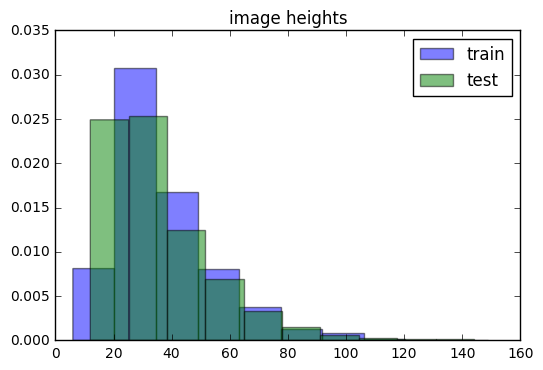

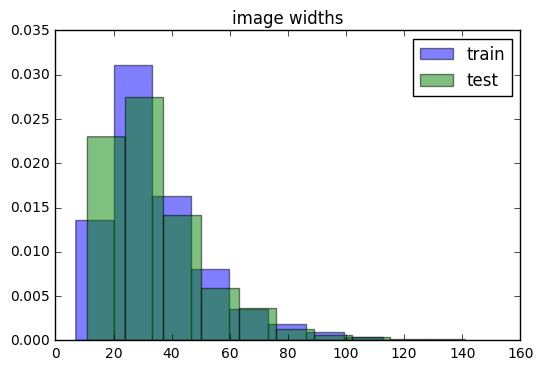

In [20]:
#-------------------------------
# statistics on image size
#-------------------------------
rows_train = [x_train[ii].shape[0] for ii in range(len(x_train))]
cols_train = [x_train[ii].shape[1] for ii in range(len(x_train))]
rows_test = [x_test[ii].shape[0] for ii in range(len(x_test))]
cols_test = [x_test[ii].shape[1] for ii in range(len(x_test))]

print('median # rows, train:', np.median(rows_train))
print('median # rows, test: ', np.median(rows_test))
print('median # cols, train:', np.median(cols_train))
print('median # cols, test: ', np.median(cols_test))

plt.figure()
plt.hist(rows_train, alpha=0.5, label='train', normed=True)
plt.hist(rows_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image heights')

plt.figure()
plt.hist(cols_train, alpha=0.5, label='train', normed=True)
plt.hist(cols_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image widths')


plt.show()

(6371600,)
(2220175,)


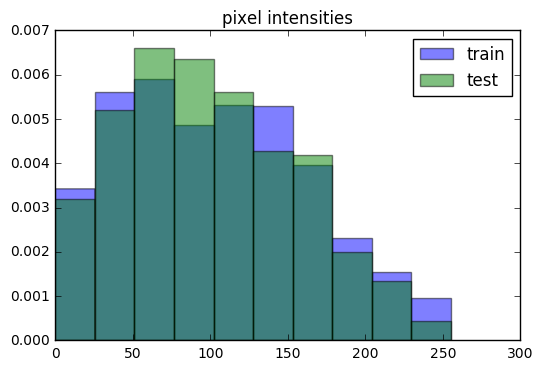

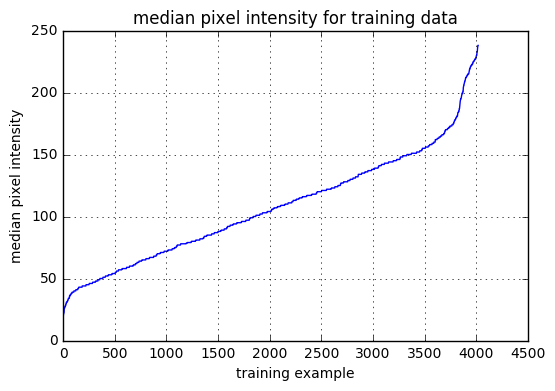

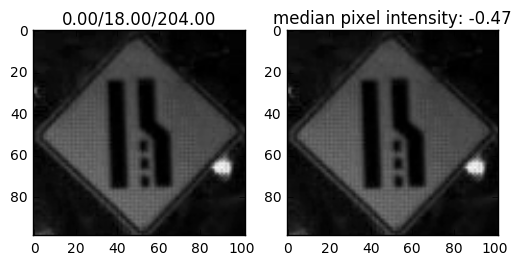

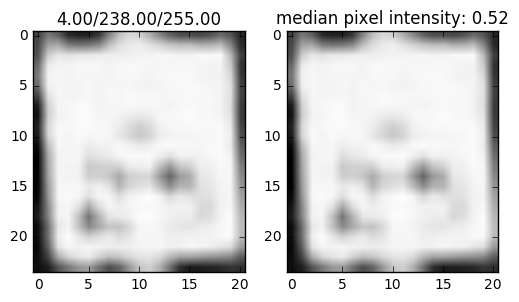

In [22]:
#-------------------------------
# Statistics on pixel intensity values
#-------------------------------
tmp = [x.ravel() for x in x_train]
x_train_flat = np.concatenate(tmp)
print(x_train_flat.shape)

tmp = [x.ravel() for x in x_test]
x_test_flat = np.concatenate(tmp)
print(x_test_flat.shape)

plt.figure()
plt.hist(x_train_flat, alpha=0.5, label='train', normed=True)
plt.hist(x_test_flat, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('pixel intensities')


#-------------------------------
# Pixel intensities (per image)
#-------------------------------
median_intensity_train = [np.median(x_train[ii]) for ii in range(len(x_train))]
median_intensity_train = np.array(median_intensity_train)
idx = np.argsort(median_intensity_train)

plt.figure()
plt.plot(median_intensity_train[idx])
plt.ylabel('median pixel intensity')
plt.xlabel('training example')
plt.title('median pixel intensity for training data')
plt.grid('on')

for img_idx in [idx[0], idx[-1]]:
    xi = np.squeeze(x_train[img_idx])
    xi_centered = (xi - np.mean(xi)) / np.std(xi)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xi, interpolation=None, cmap='gray')
    plt.title('%0.2f/%0.2f/%0.2f' % (np.min(xi), np.median(xi), np.max(xi)))
    
    plt.subplot(1,2,2)
    plt.imshow(xi_centered, interpolation=None, cmap='gray')
    plt.title('median pixel intensity: %0.2f' % np.median(xi_centered))
plt.show()
